# GRIP : The Spark Foundation 
## Data Science & Business Analytics

### Task 5 : Exploratory Data Analysis - Sports
**Level : Advanced** 

**Author Name : Amit Kumar Mondal** 

**Batch : October 2021**

**Programming Language : python**

**IDE : Jupyter Notebook**

Dataset download link : https://bit.ly/3kXTdox

<p align="center">
  <img src= "logo.jpg"/>
</p>

### Importing required libraries

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Loading Dataset

In [3]:
df_deliveries = pd.read_csv("deliveries.csv")
df_matches = pd.read_csv('matches.csv')

**inspecting the `deliveries` dataset**

In [4]:
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
print(f'Number of rows    = {df_deliveries.shape[0]}')
print(f'Number of columns = {df_deliveries.shape[1]}')

Number of rows    = 179078
Number of columns = 21


In [6]:
df_deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

**inspecting the `matches` dataset**

In [7]:
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [8]:
print(f'Number of rows    = {df_matches.shape[0]}')
print(f'Number of columns = {df_matches.shape[1]}')

Number of rows    = 756
Number of columns = 18


In [9]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [10]:
df_matches['season'].agg(['min', 'max'])

min    2008
max    2019
Name: season, dtype: int64

So Given data is from 2008 to 2019. Total of 756 matches played.

### Checking for missing values

In [11]:
df_deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

player_dismissed, dismissal_kind, fielder mostly contaning nan value

In [12]:
df_matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

Third umpire name is largrely missing.

### All Team names throughout IPL

In [13]:
print(df_matches['team1'].unique())

['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']


Replacing all team names by their shortform

In [14]:
x=['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
    'Rising Pune Supergiant', 'Royal Challengers Bangalore',
    'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
    'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
    'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants', 'Delhi Capitals']

y = ['SRH','MI','GL','RPS','RCB','KKR','DC','KXIP','CSK','RR','SRH','KTK','PW','RPS','DC']

df_matches.replace(x,y,inplace = True)
df_deliveries.replace(x,y,inplace = True)

In December 2018, the team changed its name from the Delhi Daredevils to the Delhi Capitals
Sunrisers Hyderabad replaced the Deccan Chargers in 2012 and debuted in 2013 (But i consider them same in this notebook)

### All stadiums where any match palyed

In [15]:
print(f"Total number of stadiums = {len(df_matches['venue'].unique())}\n")
print(df_matches['venue'].unique())

Total number of stadiums = 41

['Rajiv Gandhi International Stadium, Uppal'
 'Maharashtra Cricket Association Stadium'
 'Saurashtra Cricket Association Stadium' 'Holkar Cricket Stadium'
 'M Chinnaswamy Stadium' 'Wankhede Stadium' 'Eden Gardens'
 'Feroz Shah Kotla' 'Punjab Cricket Association IS Bindra Stadium, Mohali'
 'Green Park' 'Punjab Cricket Association Stadium, Mohali'
 'Sawai Mansingh Stadium' 'MA Chidambaram Stadium, Chepauk'
 'Dr DY Patil Sports Academy' 'Newlands' "St George's Park" 'Kingsmead'
 'SuperSport Park' 'Buffalo Park' 'New Wanderers Stadium'
 'De Beers Diamond Oval' 'OUTsurance Oval' 'Brabourne Stadium'
 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium' 'Nehru Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Subrata Roy Sahara Stadium'
 'Shaheed Veer Narayan Singh International Stadium'
 'JSCA International Stadium Complex' 'Sheikh Zayed Stadium'
 'Sharj

In [16]:
df_matches['venue'].value_counts()

Eden Gardens                                            77
M Chinnaswamy Stadium                                   73
Wankhede Stadium                                        73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

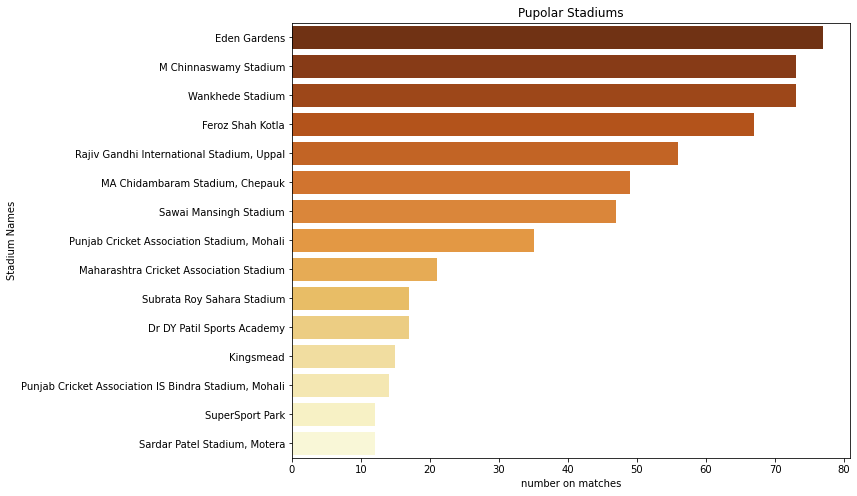

In [17]:
stadiums_counts = df_matches['venue'].value_counts().head(15)

fig = plt.figure(figsize=(10, 8))
sns.barplot(y=stadiums_counts.index, x=stadiums_counts.values,palette="YlOrBr_r")

plt.ylabel("Stadium Names")
plt.xlabel("number on matches")
plt.title("Pupolar Stadiums")
plt.show()

Eden Gardens is most popular stadium for IPL till now. Total of 77 matches played on the ground.

### Most Popular Cities

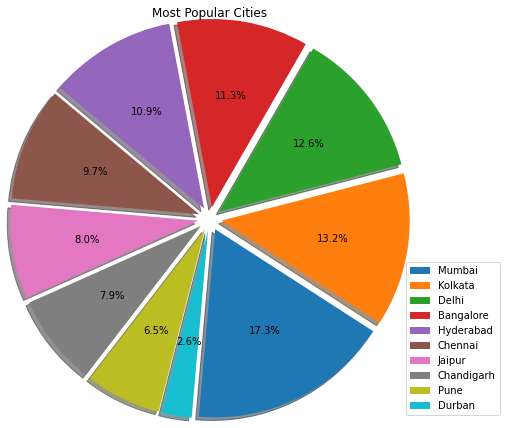

In [18]:
most_pop_cities = df_matches['city'].value_counts().head(10)

plt.figure(figsize=(10, 6))
explode = [0.075 for _ in range(len(most_pop_cities))]


plt.pie(most_pop_cities.values,
        explode=explode,
        autopct='%1.1f%%',
        shadow=True,
        textprops={'fontsize': 10},
        startangle=-95,
        radius=1.2,
        labeldistance=1.5)

plt.title("Most Popular Cities")
plt.legend(labels=most_pop_cities.index, loc=(1, 0))
plt.tight_layout()
plt.show()

Most popular city is Mumbai(17.3 %), then kolkata(13.2 %) so on and so fore.

### How many matches per season ?

In [19]:
count_season = pd.DataFrame()

tempDf = df_matches.groupby(by=['season'])['id'].count()
count_season['season'] = tempDf.index
count_season['matches'] = tempDf.values

count_season

,season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


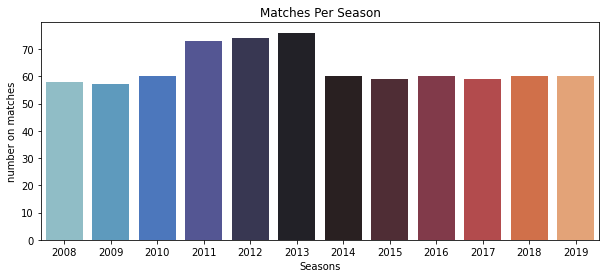

In [20]:
fig = plt.figure(figsize=(10, 4))
sns.barplot(x=count_season['season'], y=count_season['matches'],palette="icefire")

plt.xlabel("Seasons")
plt.ylabel("number on matches")
plt.title("Matches Per Season")
plt.show()

In [21]:
count_season['matches'].agg(['median', 'min', 'max'])

median    60.0
min       57.0
max       76.0
Name: matches, dtype: float64

Each season, almost 60 matches were played. However, we see a spike in the number of matches from 2011 to 2013. This is because two new franchises, the Pune Warriors and Kochi Tuskers Kerala, were introduced, increasing the number of teams to 10.

### Match played by each teams

In [22]:
matches_played=pd.concat([df_matches['team1'],df_matches['team2']])
matches_played = matches_played.value_counts().reset_index()
matches_played.columns=['Team','Total Matches']

matches_played

,Team,Total Matches
0,MI,187
1,SRH,183
2,RCB,180
3,KKR,178
4,DC,177
5,KXIP,176
6,CSK,164
7,RR,147
8,PW,46
9,GL,30


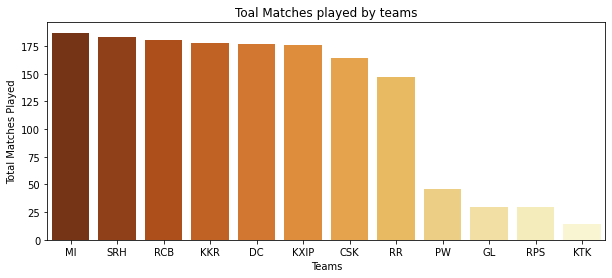

In [23]:
fig = plt.figure(figsize=(10, 4))
sns.barplot(x=matches_played['Team'], y=matches_played['Total Matches'],palette="YlOrBr_r")

plt.xlabel("Teams")
plt.ylabel("Total Matches Played")
plt.title("Toal Matches played by teams")
plt.show()

MI played highest number of matches, total of 187. Followed by SRH, RCB, KKR etc.

### Total wins by each teams

In [24]:
match_played = pd.DataFrame()

tempDf = df_matches['winner'].value_counts()
match_played['Team'] = tempDf.index
match_played['Winning Matches'] = tempDf.values

match_played

,Team,Winning Matches
0,MI,109
1,CSK,100
2,KKR,92
3,SRH,87
4,RCB,84
5,KXIP,82
6,DC,77
7,RR,75
8,RPS,15
9,GL,13


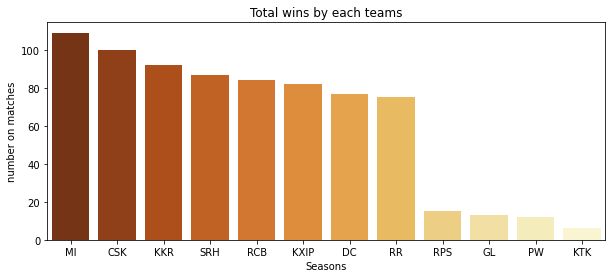

In [25]:
fig = plt.figure(figsize=(10, 4))
sns.barplot(x=match_played['Team'], y=match_played['Winning Matches'],palette="YlOrBr_r")

plt.xlabel("Seasons")
plt.ylabel("number on matches")
plt.title("Total wins by each teams")
plt.show()

MI won highest number of matches, total of 109. Followed by CSK(100), KKR(92) etc.

### WIN Ratio among teams

In [26]:
matches_played = pd.concat([df_matches['team1'],df_matches['team2']])
matches_played = matches_played.value_counts().reset_index()
matches_played.columns = ['Team','Total Matches']

matches_played['wins']=df_matches['winner'].value_counts().reset_index()['winner']

matches_played['WIN Ratio'] = matches_played['wins'] / matches_played['Total Matches']
matches_played = matches_played.iloc[:8,:]
matches_played.sort_values('WIN Ratio', axis=0, ascending=False, inplace=True)
matches_played

,Team,Total Matches,wins,WIN Ratio
0,MI,187,109,0.582888
1,SRH,183,100,0.546448
2,RCB,180,92,0.511111
7,RR,147,75,0.510204
3,KKR,178,87,0.488764
4,DC,177,84,0.474576
6,CSK,164,77,0.469512
5,KXIP,176,82,0.465909


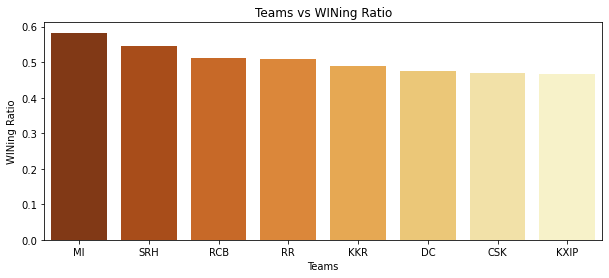

In [27]:
fig = plt.figure(figsize=(10, 4))
sns.barplot(x=matches_played['Team'], y=matches_played['WIN Ratio'],palette="YlOrBr_r")

plt.xlabel("Teams")
plt.ylabel("WINing Ratio")
plt.title("Teams vs WINing Ratio")
plt.show()

Again MI have higher ratio of winning about 58%. Followed by SRH(54%), RCB(51%) etc.

### Total Runs per Season

In [28]:
total_runs = df_matches[['id', 'season']]
total_runs_del = df_deliveries.groupby('match_id')['total_runs'].sum()

total_runs_mergred = pd.merge(total_runs, total_runs_del, 
        left_on='id',
        right_on=total_runs_del.index).iloc[:, 1:]

final_total_runs = total_runs_mergred.groupby('season')['total_runs'].sum().reset_index()

final_total_runs

,season,total_runs
0,2008,17937
1,2009,16353
2,2010,18883
3,2011,21154
4,2012,22453
5,2013,22602
6,2014,18931
7,2015,18353
8,2016,18862
9,2017,18786


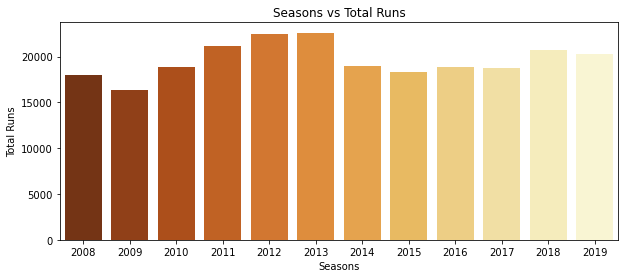

In [29]:
fig = plt.figure(figsize=(10, 4))
sns.barplot(x=final_total_runs['season'], y=final_total_runs['total_runs'],palette="YlOrBr_r")

plt.xlabel("Seasons")
plt.ylabel("Total Runs")
plt.title("Seasons vs Total Runs")
plt.show()

Season 2013 was the highest scoring season (22,602 runs), followed by 2012 (22,453 runs)
Season 2009 was the lowest scoring season (16,353 runs).

### AVG run per match for each season

Based on 1st Innings

In [30]:
total_runs = df_matches[['id', 'season']]
total_runs_del = df_deliveries[df_deliveries['inning'] == 1].groupby('match_id')['total_runs'].sum()

total_runs_mergred = pd.merge(total_runs, total_runs_del, 
        left_on='id',
        right_on=total_runs_del.index).iloc[:, 1:]

final_avg_runs_1st_innings = round(total_runs_mergred.groupby('season')['total_runs'].median().reset_index())

final_avg_runs_1st_innings

,season,total_runs
0,2008,160.0
1,2009,149.0
2,2010,169.0
3,2011,156.0
4,2012,159.0
5,2013,158.0
6,2014,160.0
7,2015,167.0
8,2016,162.0
9,2017,163.0


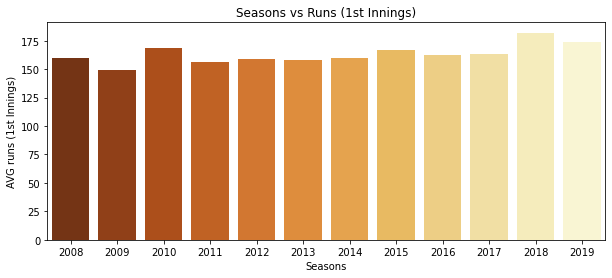

In [31]:
fig = plt.figure(figsize=(10, 4))

sns.barplot(x=final_avg_runs_1st_innings['season'],
            y=final_avg_runs_1st_innings['total_runs'],
            palette="YlOrBr_r")

plt.xlabel("Seasons")
plt.ylabel("AVG runs (1st Innings)")
plt.title("Seasons vs Runs (1st Innings)")
plt.show()

Season 2018 was the highest per match scoring season for 1st innings (182 runs), followed by 2019 (174 runs) Season 2009 was the lowest scoring season (149 runs).

Based on 2nd Innings

In [32]:
total_runs = df_matches[['id', 'season']]
total_runs_del = df_deliveries[df_deliveries['inning'] == 2].groupby('match_id')['total_runs'].sum()

total_runs_mergred = pd.merge(total_runs, total_runs_del, 
        left_on='id',
        right_on=total_runs_del.index).iloc[:, 1:]

final_avg_runs_2nd_innings = round(total_runs_mergred.groupby('season')['total_runs'].median().reset_index())

final_avg_runs_2nd_innings

,season,total_runs
0,2008,152.0
1,2009,141.0
2,2010,146.0
3,2011,141.0
4,2012,144.0
5,2013,139.0
6,2014,158.0
7,2015,156.0
8,2016,158.0
9,2017,159.0


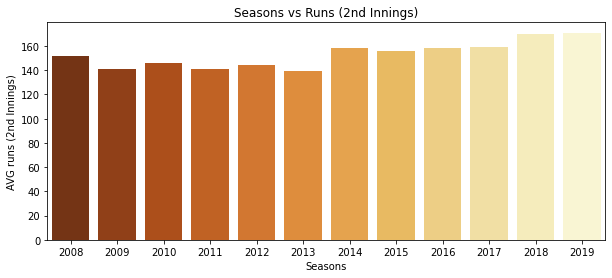

In [33]:
fig = plt.figure(figsize=(10, 4))

sns.barplot(x=final_avg_runs_2nd_innings['season'],
            y=final_avg_runs_2nd_innings['total_runs'],
            palette="YlOrBr_r")

plt.xlabel("Seasons")
plt.ylabel("AVG runs (2nd Innings)")
plt.title("Seasons vs Runs (2nd Innings)")
plt.show()

Season 2019 was the highest per match scoring season for 2nd innings (171 runs), followed by 2018 (170 runs) Season 2009 was the lowest scoring season (141 runs).

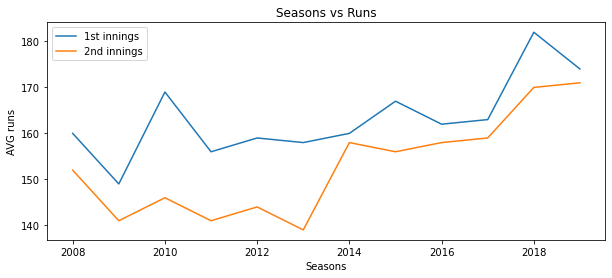

In [34]:
fig = plt.figure(figsize=(10, 4))

sns.lineplot(x=final_avg_runs_1st_innings['season'],
            y = final_avg_runs_1st_innings['total_runs'], )

sns.lineplot(x=final_avg_runs_2nd_innings['season'],
            y = final_avg_runs_2nd_innings['total_runs'])

plt.xlabel("Seasons")
plt.ylabel("AVG runs")
plt.title("Seasons vs Runs")
plt.legend(['1st innings', '2nd innings'])
plt.show()

We can see that on 1st innings teams scored higher than 2nd innings for all IPL seasons.

### Toss WIN rate for each teams

In [35]:
total_toss_win = df_matches['toss_winner'].value_counts().reset_index()
total_toss_win.columns = ['Team', 'Toss WIN']
total_toss_win

,Team,Toss WIN
0,MI,98
1,KKR,92
2,DC,90
3,SRH,89
4,CSK,89
5,RCB,81
6,KXIP,81
7,RR,80
8,PW,20
9,GL,15


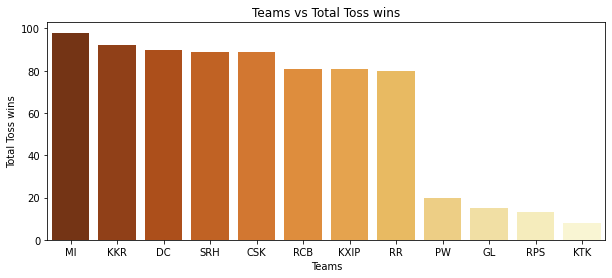

In [36]:
fig = plt.figure(figsize=(10, 4))

sns.barplot(x=total_toss_win['Team'],
            y=total_toss_win['Toss WIN'],
            palette="YlOrBr_r")

plt.xlabel("Teams")
plt.ylabel("Total Toss wins")
plt.title("Teams vs Total Toss wins")
plt.show()

MI won toss 98 times which is highest among all other teams. We can asy MI team is luckiest team for toss round. After that KKR won toss 92 times and KTK won lowest 8 times.

In [37]:
matches_played=pd.concat([df_matches['team1'],df_matches['team2']])
matches_played = matches_played.value_counts().reset_index()
matches_played.columns=['Team','Total Matches']

total_toss_win['Total Matches'] = matches_played['Total Matches']

In [38]:
total_toss_win['ratio'] = total_toss_win['Toss WIN'] / total_toss_win['Total Matches'] * 100
total_toss_win = total_toss_win.sort_values('ratio', axis=0, ascending=False)
total_toss_win

,Team,Toss WIN,Total Matches,ratio
11,KTK,8,14,57.142857
7,RR,80,147,54.421769
0,MI,98,187,52.406417
4,CSK,89,177,50.282486
1,KKR,92,183,50.273224
2,DC,90,180,50.000000
3,SRH,89,178,50.000000
9,GL,15,30,50.000000
6,KXIP,81,164,49.390244
5,RCB,81,176,46.022727


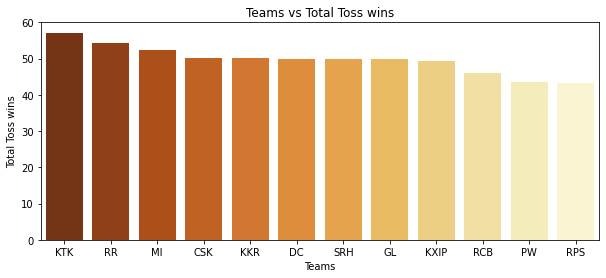

In [39]:
fig = plt.figure(figsize=(10, 4))
sns.barplot(x=total_toss_win['Team'],
            y=total_toss_win['ratio'],
            palette="YlOrBr_r")

plt.xlabel("Teams")
plt.ylabel("Total Toss wins")
plt.title("Teams vs Total Toss wins")
plt.show()

KTK have highest ratio of winning toss round (57 %) though they played played only 14 Matches.
After that RR (54 %) then MI (52 %).

### Toss Decision

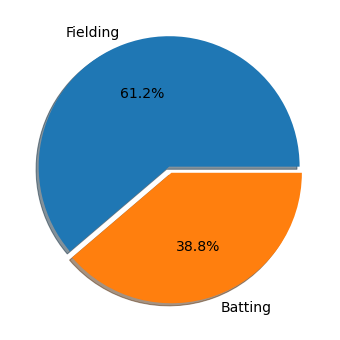

In [40]:
fig = plt.figure(figsize=(6, 6))
plt.pie(df_matches['toss_decision'].value_counts(),
        labels=['Fielding', 'Batting'],
       explode=[0.025, 0.025], autopct='%1.1f%%', shadow=True, textprops={'fontsize': 14})
plt.show()

Most of the times toss won team choose to bowl first than batting.

### Toss decision across seasons

<Figure size 720x432 with 0 Axes>

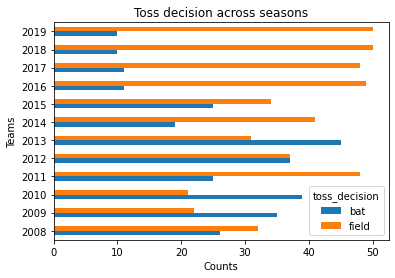

In [41]:
toss_dec = df_matches.groupby('season')['toss_decision'].value_counts().unstack()

plt.figure(figsize=(10, 6))
toss_dec.plot.barh()

plt.ylabel("Teams")
plt.xlabel("Counts")
plt.title("Toss decision across seasons")
plt.show()

Most of the times, teams decide to feild first except in season 2009, 2010, 2013 where teams decided to bat first mostly.
Since 2014, teams have overwhelmingly chosen to bat second. Especially since 2016, teams have chosen to field for more than 80% of the times.

### Winning toss a factor of winning game ?

In [42]:
df_matches['toss_win_game_win'] = np.where((df_matches.toss_winner == df_matches.winner),'Yes','No')
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,toss_win_game_win
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,No
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,Yes
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,Yes
3,4,2017,Indore,2017-04-08,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,Yes
4,5,2017,Bangalore,2017-04-08,RCB,DC,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,Yes


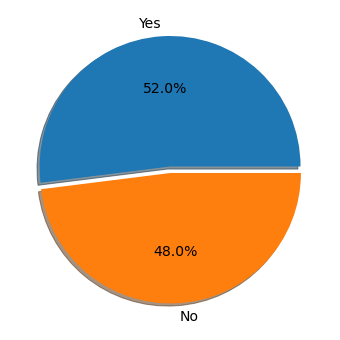

In [43]:
fig = plt.figure(figsize=(6, 6))
df_matches['toss_win_game_win'].value_counts().plot.pie(labels=['Yes', 'No'],
                                                       explode=[0.025, 0.025],
                                                        autopct='%1.1f%%',
                                                        shadow=True,
                                                        textprops={'fontsize': 14})

plt.ylabel("")
plt.show()

Though winning toss gives you an advantage but it doesn't significantly implies that winning the toss helps in winning the game

### Match Win results

In [44]:
df_matches['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [45]:
filt = df_matches['result'] == 'normal'
normal_plays = df_matches['result'].value_counts()['normal']

first_team = df_matches[filt & df_matches['win_by_runs'] > 0].shape[0]
second_team = normal_plays - first_team

print(f"Won by first batting teams = {first_team}")
print(f"Won by second batting teams = {second_team}")

Won by first batting teams = 170
Won by second batting teams = 573


We can see that 573 out of 756 matches was won by team batting second while 170 matches was won by team batting first.

### Most Titles Wins

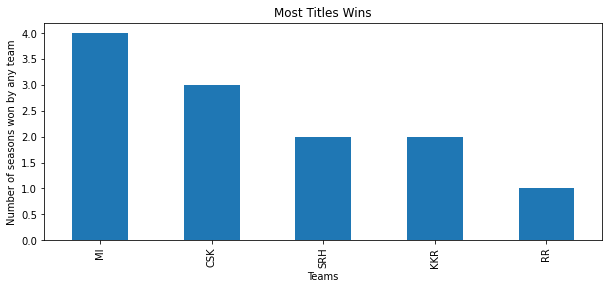

In [46]:
fig = plt.figure(figsize=(10, 4))
each_season_winner = df_matches.groupby('season')['season','winner'].tail(1)
each_season_winner_sort = each_season_winner.sort_values('season',ascending = True)

each_season_winner_sort['winner'].value_counts().plot.bar()

plt.xlabel('Teams')
plt.ylabel('Number of seasons won by any team')
plt.title('Most Titles Wins')
plt.show()

Again MI won highest number of cups 4 times.

### Winning at different Grounds

In [47]:
def fav_venue(df,team_name):
    return df[df['winner']==team_name]['venue'].value_counts().nlargest(10)

#### For CSK team

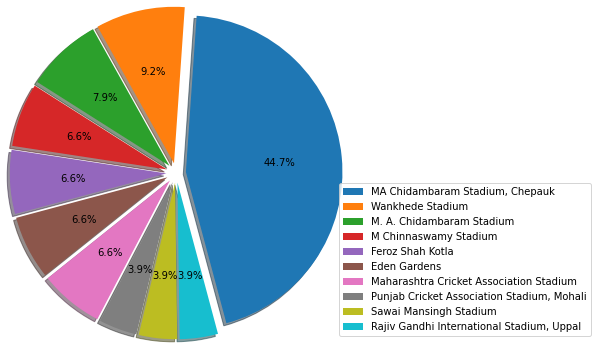

In [48]:
plt.figure(figsize=(10, 6))

csk_ground = fav_venue(df_matches, 'CSK')
explode = [0.075 for x in range(10)]

plt.pie(csk_ground.values,
        explode=explode,
        autopct='%1.1f%%',
        shadow=True,
        textprops={'fontsize': 10},
        startangle=-75,
        radius=1.2,
        labeldistance=1.5)


plt.legend(labels=csk_ground.index, loc=(1, 0))
plt.show()

#### for MI team

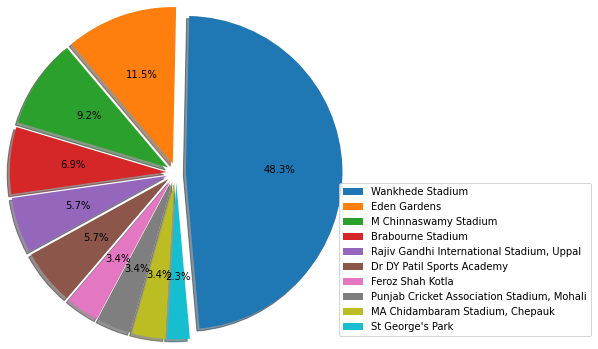

In [49]:
plt.figure(figsize=(10, 6))

csk_ground = fav_venue(df_matches, 'MI')
explode = [0.075 for x in range(10)]

plt.pie(csk_ground.values,
        explode=explode,
        autopct='%1.1f%%',
        shadow=True,
        textprops={'fontsize': 10},
        startangle=-85,
        radius=1.2,
        labeldistance=1.5)


plt.legend(labels=csk_ground.index, loc=(1, 0))
plt.show()

#### for RCB team

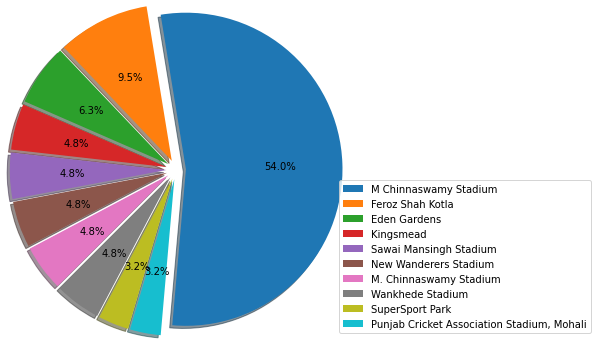

In [50]:
plt.figure(figsize=(10, 6))

csk_ground = fav_venue(df_matches, 'RCB')
explode = [0.075 for x in range(10)]

plt.pie(csk_ground.values,
        explode=explode,
        autopct='%1.1f%%',
        shadow=True,
        textprops={'fontsize': 10},
        startangle=-95,
        radius=1.2,
        labeldistance=1.5)


plt.legend(labels=csk_ground.index, loc=(1, 0))
plt.show()

### Lets analyse Batters performance

#### Most player of the match award :

In [51]:
most_player_of_match = df_matches['player_of_match'].value_counts().nlargest(10)

In [52]:
most_player_of_match

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64

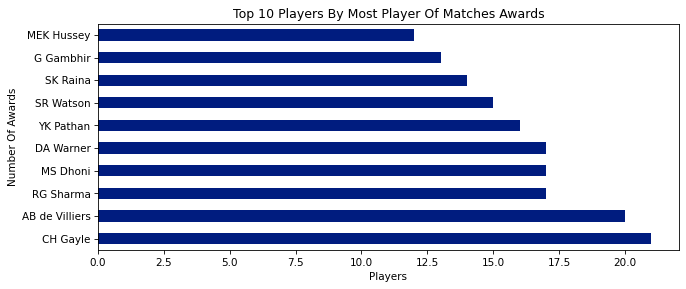

In [53]:
plt.figure(figsize=(10, 4), dpi=75)
plt.style.use('seaborn-dark-palette')

most_player_of_match.plot.barh()

plt.xlabel('Players')
plt.ylabel('Number Of Awards')
plt.title('Top 10 Players By Most Player Of Matches Awards')
plt.show()

* Most Player Of Matches Awards gose to CH Gayle in all season with 21 Awards
* The second most Awards gose to AB de Villiers

#### Most delivaries played by batsman :

In [54]:
played_most_deliveries = df_deliveries['batsman'].value_counts().nlargest(10)

played_most_deliveries

V Kohli       4211
SK Raina      4044
RG Sharma     3816
S Dhawan      3776
G Gambhir     3524
RV Uthappa    3492
DA Warner     3398
MS Dhoni      3318
AM Rahane     3215
CH Gayle      3131
Name: batsman, dtype: int64

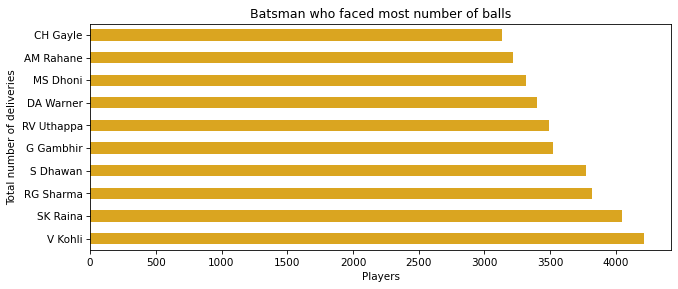

In [55]:
plt.figure(figsize=(10, 4), dpi=75)
plt.style.use('seaborn-dark-palette')
played_most_deliveries.plot.barh(color='goldenrod')

plt.xlabel('Players')
plt.ylabel('Total number of deliveries')
plt.title('Batsman who faced most number of balls')

plt.show()

* Most delivaries played batter is V Kohli , faced 4211 balls in all season 
* The second most delivaries played batter is SK Raina 

#### Top 10 Run Rate throughout IPL :

In [56]:
top_run_getter = df_deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).nlargest(10)
top_run_getter

batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
Name: batsman_runs, dtype: int64

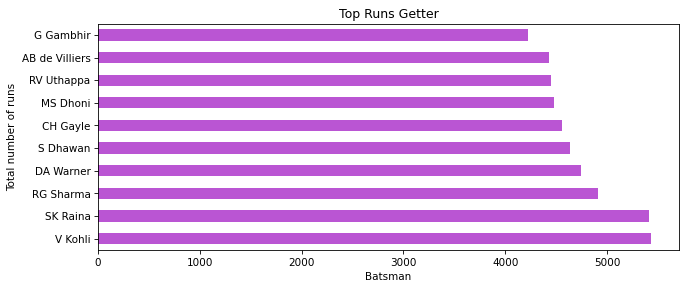

In [57]:
plt.figure(figsize=(10, 4), dpi=75)
top_run_getter.plot.barh(title='Top Runs Getter',color='mediumorchid')

plt.xlabel('Batsman')
plt.ylabel('Total number of runs')
plt.title('Top Runs Getter')

plt.show()

* From above we see top 3 player with highest run scorer per IPL season are:
  
  1. Virat Kohli
  2. Suresh Raina
  3. Rohit Sharm

#### Top 10 strike rates throughout IPL :

In [58]:
df_strike_rate = df_deliveries.groupby(['batsman']).agg({'ball':'count','batsman_runs':'mean'}).sort_values(by='batsman_runs',ascending=False)
df_strike_rate.rename(columns ={'batsman_runs' : 'strike rate'}, inplace=True)

df_runs_per_match = df_deliveries.groupby(['batsman','match_id']).agg({'batsman_runs':'sum'})

df_total_runs = df_runs_per_match.groupby(['batsman']).agg({'sum' ,'mean','count'})
df_total_runs.rename(columns ={'sum' : 'batsman run','count' : 'match count','mean' :'average score'}, inplace=True)
df_total_runs.columns = df_total_runs.columns.droplevel()

df_sixes = df_deliveries[['batsman','batsman_runs']][df_deliveries.batsman_runs==6].groupby(['batsman']).agg({'batsman_runs':'count'})

df_four = df_deliveries[['batsman','batsman_runs']][df_deliveries.batsman_runs==4].groupby(['batsman']).agg({'batsman_runs':'count'})

df_batsman_stat = pd.merge(pd.merge(pd.merge(df_strike_rate,df_total_runs, left_index=True, right_index=True),df_sixes, left_index=True, right_index=True),df_four, left_index=True, right_index=True)

In [59]:
df_batsman_stat.rename(columns = {'ball' : 'ball', 'strike rate':'strike_rate','batsman run' : 'batsman_run',
                                  'match count' : 'match_count','average score' : 'average_score' ,'batsman_runs_x' :'six',
                                  'batsman_runs_y':'four'},inplace=True)
df_batsman_stat['strike_rate'] = df_batsman_stat['strike_rate']*100
df_batsman_stat.sort_values(by='batsman_run',ascending=False,inplace=True)

df_batsman_stat.reset_index(inplace=True)

In [60]:
strike_rate=df_batsman_stat.sort_values(by='strike_rate',ascending=False)
strike_rate=strike_rate[strike_rate['match_count']>50].head(10)
strike_rate.iloc[:, [0, 2]].head()

,batsman,strike_rate
48,AD Russell,179.950187
81,SP Narine,166.943867
37,RR Pant,162.318841
51,GJ Maxwell,155.543237
61,HH Pandya,151.902174


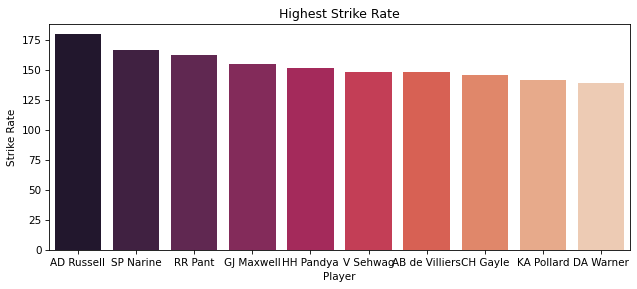

In [61]:
plt.figure(figsize=(10, 4), dpi=75)
sns.barplot(x = strike_rate['batsman'], y = strike_rate['strike_rate'],palette="rocket")

plt.xlabel("Player")
plt.ylabel("Strike Rate")
plt.title("Highest Strike Rate")
plt.show()

* AD Russell had the top strick rate in all season with 175 strike rate
* SP Narine had the second top strick rate with 166 

#### Highest Average Score throughout IPL :

In [62]:
average_score=df_batsman_stat.sort_values(by='average_score',ascending=False)
average_score=average_score[average_score['match_count']>50].head(10)
average_score.iloc[:, [0, 3]]

,batsman,batsman_run
3,DA Warner,4741
5,CH Gayle,4560
22,SE Marsh,2489
31,KL Rahul,2013
32,MEK Hussey,1977
37,RR Pant,1792
0,V Kohli,5434
8,AB de Villiers,4428
25,SR Tendulkar,2334
4,S Dhawan,4632


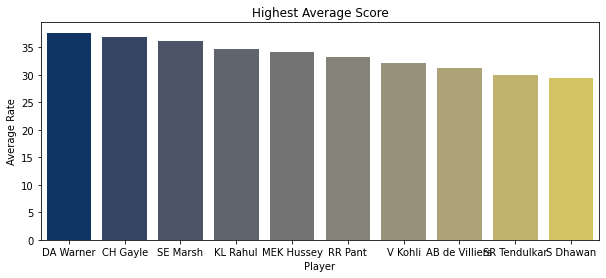

In [63]:
plt.figure(figsize=(10, 4))
sns.barplot(x = average_score['batsman'], y = average_score['average_score'],palette="cividis")

plt.xlabel("Player")
plt.ylabel("Average Rate")
plt.title("Highest Average Score")
plt.show()

* DA Warner had highest Average Score in all season with 37.62 average rate
* CH Gayle had second Average Score in all season with  average36.77 rate

#### Top 10 most number of 4's per player:



In [64]:
balls_played = df_deliveries.groupby(['batsman'])['ball'].count().reset_index()

runs=df_deliveries.groupby(['batsman'])['batsman_runs'].sum().reset_index()
runs.columns=['Batsman','runs']

y=runs.sort_values(by='runs',ascending=False).head(10).reset_index().drop('index',axis=1)

balls_played = balls_played.merge(runs,left_on='batsman',right_on='Batsman',how='outer')
four=df_deliveries[df_deliveries['batsman_runs']==4]
runs_4=four.groupby('batsman')['batsman_runs'].count().reset_index()
runs_4.columns=['Batsman','4s']
runs_4 = runs_4.sort_values(by='4s',ascending=False).head(10).reset_index().drop('index',axis=1)[0:10]

runs_4

,Batsman,4s
0,S Dhawan,526
1,SK Raina,495
2,G Gambhir,492
3,V Kohli,482
4,DA Warner,459
5,RV Uthappa,436
6,RG Sharma,431
7,AM Rahane,405
8,CH Gayle,376
9,PA Patel,366


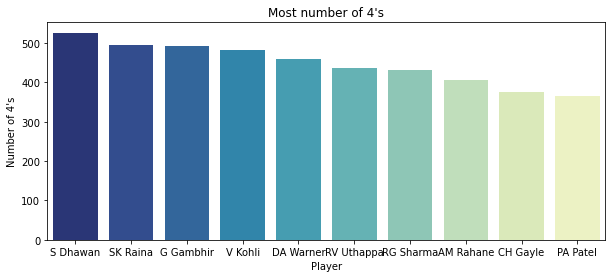

In [65]:
plt.figure(figsize=(10, 4))
sns.barplot(x = runs_4['Batsman'], y = runs_4['4s'], palette="YlGnBu_r")
plt.xlabel("Player")
plt.ylabel("Number of 4's")
plt.title("Most number of 4's")
plt.show()

* S Dhawan daliverd most numbers of 4's in all season with 526 4's

#### Top 10 most number of 6's per player:

In [66]:
six = df_deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()
six.columns=['Batsman','6s']
six = six.sort_values(by='6s',ascending=False).head(10).reset_index().drop('index',axis=1)[0:10]
six.head()

,Batsman,6s
0,CH Gayle,327
1,AB de Villiers,214
2,MS Dhoni,207
3,SK Raina,195
4,RG Sharma,194


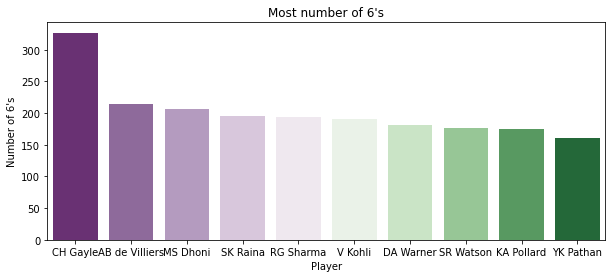

In [67]:
plt.figure(figsize=(10, 4))
sns.barplot(x = six['Batsman'], y = six['6s'], palette="PRGn")
plt.xlabel("Player")
plt.ylabel("Number of 6's")
plt.title("Most number of 6's")
plt.show()

* CH Gayle daliverd most numbers of 6's in all season 327 6's

#### Orange Cap Holders :

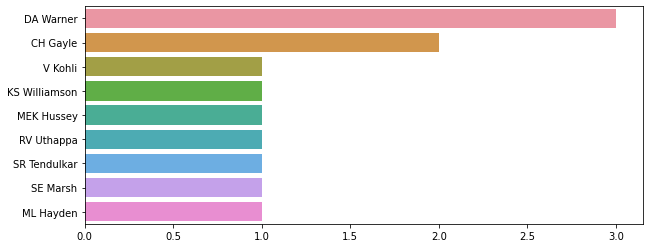

In [68]:
orange = df_matches[['id','season']]
orange = orange.merge(df_deliveries,left_on='id',right_on='match_id',how='left')
orange = orange.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
orange = orange.sort_values('batsman_runs',ascending=0)
orange = orange.drop_duplicates(subset=["season"],keep="first")

plt.figure(figsize=(10, 4))
sns.barplot(y = orange['batsman'].value_counts().index, x = orange['batsman'].value_counts().values)
plt.show()

* DA Warner owned most Orange Cap Holder, 3 times 
* CH Gayle owned second most Orange Cap Holder, 2 times

#### Now analysis these top 3 player's individual performance :

In [69]:
df = pd.merge(df_matches,df_deliveries,left_on='id',right_on='match_id')

##### Virat Kohli total runs per season

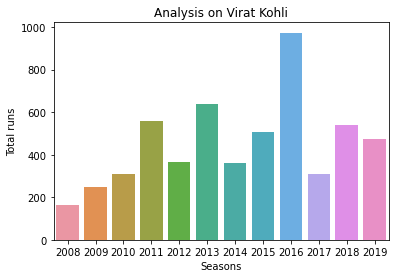

In [70]:
Kohli = df[df['batsman']=='V Kohli']
Kohli = Kohli.groupby('season')['batsman_runs'].sum()
sns.barplot(x=Kohli.index, y=Kohli.values)

plt.xlabel('Seasons')
plt.ylabel('Total runs')
plt.title('Analysis on Virat Kohli')
plt.show()

##### Suresh Raina total runs per season

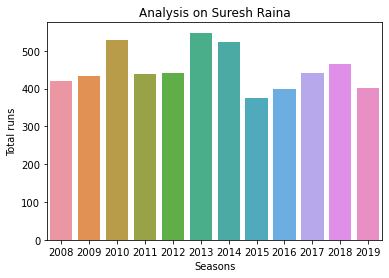

In [71]:
raina = df[df['batsman']=='SK Raina']
raina = raina.groupby('season')['batsman_runs'].sum()
sns.barplot(x=raina.index, y=raina.values)

plt.xlabel('Seasons')
plt.ylabel('Total runs')
plt.title('Analysis on Suresh Raina')
plt.show()

##### Rohit Sharma total runs per season

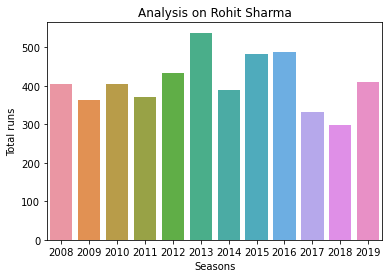

In [72]:
sharma = df[df['batsman']=='RG Sharma']
sharma = sharma.groupby('season')['batsman_runs'].sum()
sns.barplot(x=sharma.index, y=sharma.values)

plt.xlabel('Seasons')
plt.ylabel('Total runs')
plt.title('Analysis on Rohit Sharma')
plt.show()

#### Plotting a line chart to compaire their performance

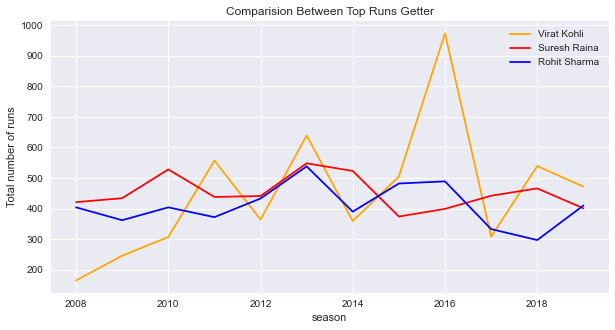

In [73]:
plt.style.use('seaborn')

Kohli.plot.line(xlabel='Season',ylabel='Total number of runs',title='Comparision Between Top Runs Getter',color='orange',figsize=(10,5),label='Virat Kohli')
raina.plot.line(color='red',figsize=(10,5),label='Suresh Raina')
sharma.plot.line(color='blue',figsize=(10,5),label='Rohit Sharma')

plt.legend()

plt.show()

##### From This We can Infer That
* Suresh Raina is the most consistent player in the IPL history
* Rohit Sharma is also consistent but not as consistent as Suresh Raina
* Virat Kohli didn't started his career well in IPL. We can see there are sharp rise & decline of runs trend in alternate seasons and as we can see a shape rise in Virat Kohli runs in 2016 season that means his most succesful season was 2016 where we performed exceptionally well, also Virat Kohli is least consistent among the three players

## Lets analyse Bowlers performance

### Creating a different dataframe to include every bowlers performance

In [74]:
gb = df_deliveries.groupby('bowler')

In [75]:
def filt(x):
    if isinstance(x,str) and x!='run out':
        return 1
    else:
        return 0

In [76]:
df_deliveries['wicket_count'] = df_deliveries['player_dismissed'].map(filt)
temp1 = gb[['batsman_runs','extra_runs','total_runs','wicket_count']].agg('sum').sort_values(by='wicket_count',axis=0,ascending=False).reset_index()
temp2 = df_deliveries['bowler'].value_counts().reset_index()

In [77]:
df_bowler = pd.merge(left=temp1,right=temp2,left_on='bowler',right_on='index')
df_bowler = df_bowler.drop(columns='index',axis=1)
df_bowler.columns = ['bowler','batter_runs','extra_runs','total_runs','wicket_count','total_balls']
df_bowler.head()

,bowler,batter_runs,extra_runs,total_runs,wicket_count,total_balls
0,SL Malinga,3218,293,3511,188,2974
1,DJ Bravo,3532,201,3733,168,2711
2,A Mishra,3727,123,3850,165,3172
3,Harbhajan Singh,3880,170,4050,161,3451
4,PP Chawla,4022,131,4153,156,3157


### Most Wicket Taker among all season

In [78]:
df_bowler.head()  ## as the dataframe is already sorted in decreasing number of wicket has been taken

,bowler,batter_runs,extra_runs,total_runs,wicket_count,total_balls
0,SL Malinga,3218,293,3511,188,2974
1,DJ Bravo,3532,201,3733,168,2711
2,A Mishra,3727,123,3850,165,3172
3,Harbhajan Singh,3880,170,4050,161,3451
4,PP Chawla,4022,131,4153,156,3157


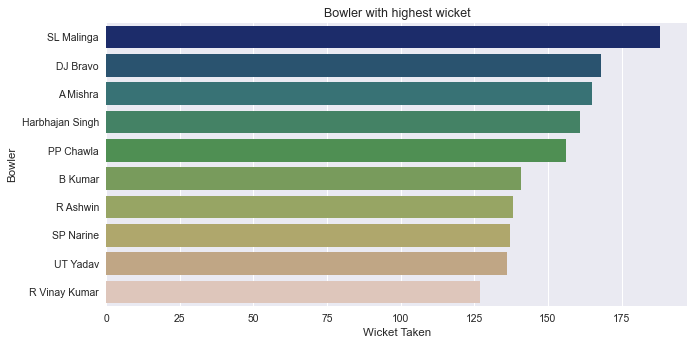

In [79]:
plt.figure(figsize=(10,5),dpi=75)
sns.barplot(x='wicket_count',y='bowler',data=df_bowler[:10],palette='gist_earth')

plt.xlabel('Wicket Taken')
plt.ylabel('Bowler')
plt.title('Bowler with highest wicket')
plt.show()

* **SL Malinga** is highest wicket taker of IPL with 188 wicket upto year 2019 so far and DJ Bravo is next highest wicket taker.

### Most conceded run by a bowler

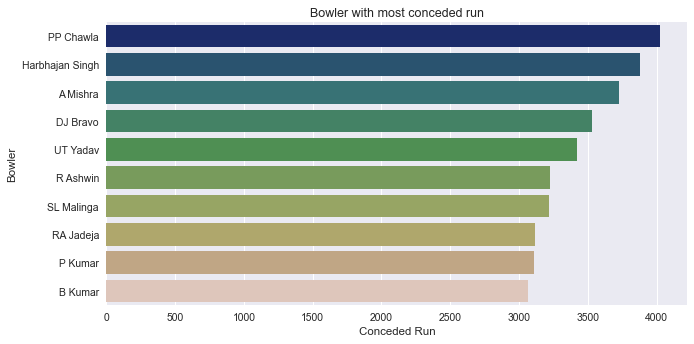

In [80]:
plt.figure(figsize=(10,5),dpi=75)
sns.barplot(x='batter_runs',y='bowler',data=df_bowler.sort_values(by='batter_runs',ascending=False)[:10],palette='gist_earth')

plt.xlabel('Conceded Run')
plt.ylabel('Bowler')
plt.title('Bowler with most conceded run')
plt.show()

* **PP Chawla** Conceded most run in history of IPL so far and Harbhajan Singh is next to him.

### Bowler gave most extra run 

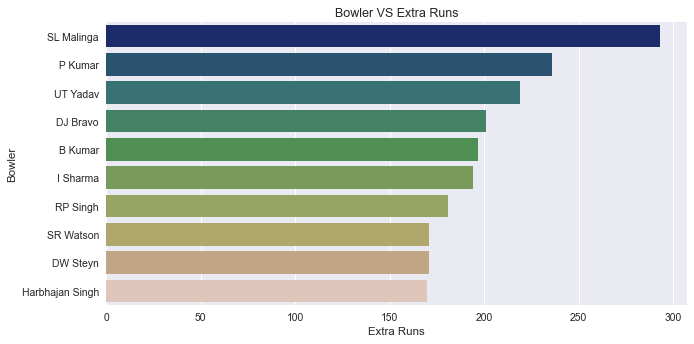

In [81]:
plt.figure(figsize=(10,5),dpi=75)
sns.barplot(x='extra_runs',y='bowler',data=df_bowler.sort_values(by='extra_runs',ascending=False)[:10],palette='gist_earth')

plt.xlabel('Extra Runs')
plt.ylabel('Bowler')
plt.title('Bowler VS Extra Runs')
plt.show()

* **SL Malinga** also gave most extra runs upto year 2018 in IPL so far followed by P Kumar.

#### Economy Rate

In [82]:
def cal_eco_rate(tot_deliveries,run_conceded):   # function for calculating economic rate
    return round((run_conceded/tot_deliveries)*6,2)

In [83]:
df_bowler['economy_rate'] = df_bowler.apply(lambda row: cal_eco_rate(row['total_balls'],row['total_runs']),axis=1)

* Calculating economic rate for the bowler who bowled minimum 1000 ball.

In [84]:
filt = df_bowler['total_balls'] >= 1000
temp = df_bowler[filt]
temp.sort_values('economy_rate', ascending=True).head(10)

,bowler,batter_runs,extra_runs,total_runs,wicket_count,total_balls,economy_rate
14,DW Steyn,2283,171,2454,104,2207,6.67
40,M Muralitharan,1642,123,1765,67,1581,6.70
6,R Ashwin,3224,167,3391,138,3016,6.75
7,SP Narine,2825,114,2939,137,2600,6.78
45,Rashid Khan,1214,43,1257,60,1106,6.82
3,Harbhajan Singh,3880,170,4050,161,3451,7.04
0,SL Malinga,3218,293,3511,188,2974,7.08
43,SK Warne,1408,57,1465,60,1223,7.19
75,M Kartik,1341,77,1418,39,1182,7.20
5,B Kumar,3067,197,3264,141,2707,7.23


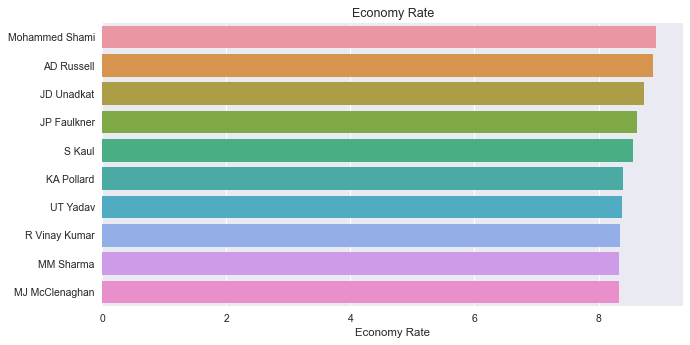

In [85]:
plt.figure(figsize=(10,5),dpi=75)
sns.barplot(y='bowler',x='economy_rate',data=temp.sort_values(by='economy_rate', ascending=False).head(10))

plt.xlabel("Economy Rate")
plt.ylabel('')
plt.title('Economy Rate')
plt.show()

* **DW Steyn** is economically best (6.67) in IPL with minimum 1000 ball deliveries followed by M Muralitharan.

#### Purple cap holder all season

In [86]:
purple = df_matches[['id','season']]
purple = purple.merge(df_deliveries,left_on='id',right_on='match_id',how='left')
purple = purple.groupby(['season','bowler'])['wicket_count'].sum().reset_index()
purple = purple.sort_values('wicket_count',ascending=0)
purple = purple.drop_duplicates(subset=["season"],keep="first")

purple = purple.sort_values(by='season')
purple.set_index('season')

,bowler,wicket_count
season,,
2008,Sohail Tanvir,24
2009,RP Singh,26
2010,PP Ojha,22
2011,SL Malinga,30
2012,M Morkel,30
2013,DJ Bravo,34
2014,MM Sharma,26
2015,DJ Bravo,28
2016,B Kumar,24


* It is the list of purple cap winner upto season 2018

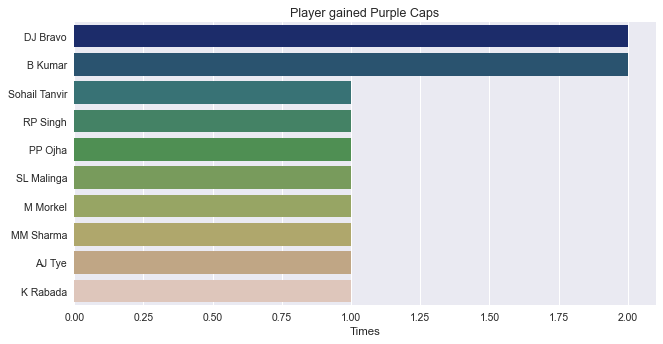

In [87]:
purple_cap_gain= purple['bowler'].value_counts()
plt.figure(figsize=(10,5),dpi=75)
sns.barplot(y=purple_cap_gain.index,x=purple_cap_gain.values,palette='gist_earth')

plt.xlabel('Times')
plt.title('Player gained Purple Caps')
plt.show()

* B Kumar and DJ Bravo both gained purple cap most number of times (2).  

## Miscellaneous Analysis

### Fielder's involvement in wicket

In [88]:
fielding = df_deliveries['fielder'].value_counts().head(10)
fielding

MS Dhoni          159
KD Karthik        152
RV Uthappa        125
SK Raina          115
AB de Villiers    114
PA Patel           97
RG Sharma          92
V Kohli            90
KA Pollard         85
NV Ojha            82
Name: fielder, dtype: int64

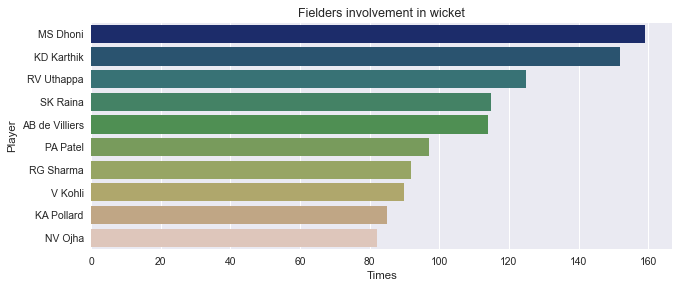

In [89]:
plt.figure(figsize=(10, 4),dpi=75)
sns.barplot(y=fielding.index,x=fielding.values,palette='gist_earth')

plt.xlabel('Times')
plt.ylabel('Player')
plt.title('Fielders involvement in wicket')
plt.show()

* MS Dhoni is involved in most of the dismissal can be done by a fielder.

### Most occured dismissal type

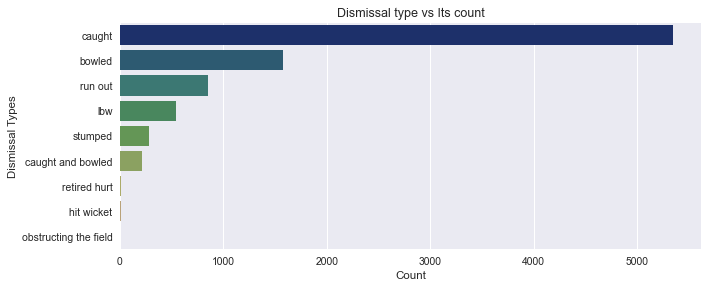

In [90]:
plt.figure(figsize=(10, 4),dpi=75)
temp2 = df_deliveries['dismissal_kind'].value_counts()
sns.barplot(y=temp2.index, x=temp2.values,palette='gist_earth')

plt.xlabel('Count')
plt.ylabel('Dismissal Types')
plt.title('Dismissal type vs Its count')
plt.show()

- most occured dismissal type is caught out, followed by bowled and run out. Obstructing the field is least occured dismissal type.

### 200+ scoring teams throughout IPL 

In [91]:
filt = df_deliveries['inning'] == 1
df = df_deliveries[filt]

In [92]:
team = df.groupby(['batting_team', 'match_id'])['total_runs'].sum()
team.head()

batting_team  match_id
CSK           61          240
              67          208
              74          178
              79          169
              83          109
Name: total_runs, dtype: int64

In [93]:
dict = {}

for col in team.index:
    teamName = col[0]
    
    if team[col] >= 200:
        if teamName not in dict:
            dict[teamName] = 1
        else:
            dict[teamName] += 1

In [94]:
df = pd.DataFrame()
df['team names'] = dict.keys()
df['count'] =dict.values()
df = df.sort_values(by='count',ascending=False)
df.head()

,team names,count
6,RCB,16
0,CSK,11
5,MI,10
3,KKR,9
4,KXIP,9


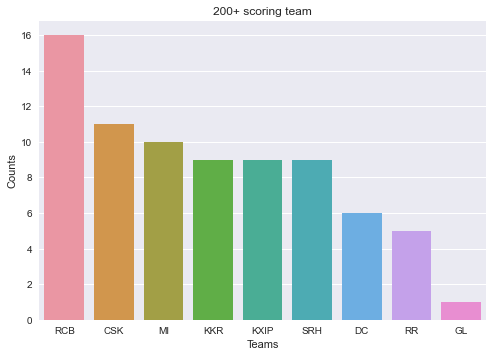

In [95]:
sns.barplot(x=df['team names'], y=df['count'])
plt.xlabel('Teams')
plt.ylabel('Counts')

plt.title('200+ scoring team')
plt.show()

* RCB scored most 200+ runs, 16 times while batting first follwed by CSK

### Calculate percentage of boundaries per season

In [96]:
def func(x):   # for calculating total boundaries
    if x==4 or x==6:
        return x
    else:
        return 0

In [97]:
df_deliveries['boundaries'] = df_deliveries['batsman_runs'].map(func)
boundaries_run = df_deliveries.groupby('match_id')[['boundaries', 'total_runs']].sum().reset_index()
boundaries_run = pd.merge(df_matches[['id', 'season']], boundaries_run, left_on='id', right_on='match_id')
boundaries_run =boundaries_run.drop(['match_id', 'id'], axis=1)

In [98]:
boundary = pd.DataFrame()
boundary['boundaries runs']=boundaries_run.groupby('season')['boundaries'].sum()
boundary['total runs'] = boundaries_run.groupby('season')['total_runs'].sum()
boundary['ratio'] = boundary['boundaries runs'] / boundary['total runs'] * 100
boundary.sort_values(by='ratio',ascending=False)

,boundaries runs,total runs,ratio
season,,,
2008,10550,17937,58.816971
2015,10596,18353,57.734430
2018,11910,20706,57.519560
2017,10684,18786,56.872139
2019,11408,20270,56.280217
2014,10542,18931,55.686440
2016,10366,18862,54.957057
2010,10358,18883,54.853572
2013,12302,22602,54.428812


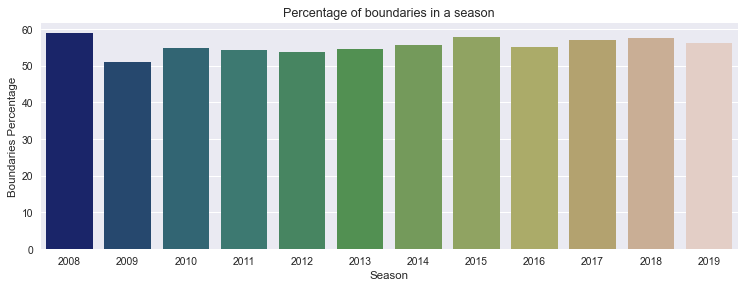

In [99]:
plt.figure(figsize=(12,4),dpi=75)
sns.barplot(y=boundary['ratio'],x=boundary.index,palette='gist_earth')

plt.ylabel('Boundaries Percentage')
plt.xlabel('Season')
plt.title('Percentage of boundaries in a season')
plt.show()

- The fact can be seen that the most percentage of scoring runs by boundaries is 2008 followed by 2015. In 2009 the percentage is least.

### Popular umpire of all time

In [100]:
umpire1 = df_matches['umpire1'].value_counts().reset_index()
umpire2 = df_matches['umpire2'].value_counts().reset_index()

In [101]:
umpire = pd.merge(umpire1,umpire2,how='outer', left_on='index',right_on='index')
umpire = umpire.replace(np.nan, 0)

In [102]:
umpire['count'] = umpire['umpire1'] + umpire['umpire2']
umpire = umpire.drop(['umpire1','umpire2'], axis=1)

In [103]:
umpire = umpire.sort_values('count', ascending=False).head(10)

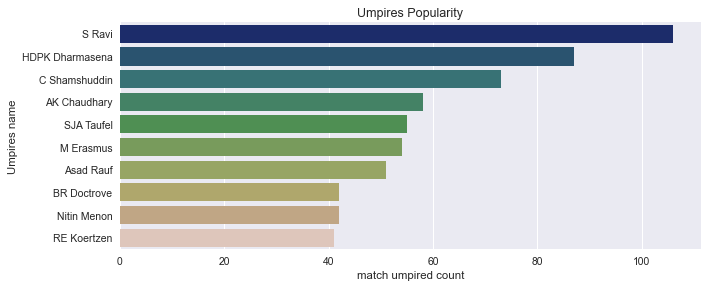

In [104]:
plt.figure(figsize=(10,4),dpi=75)
sns.barplot(x='count',y='index',data=umpire.sort_values(by='count',ascending=False)[:10],palette='gist_earth')

plt.xlabel('match umpired count')
plt.ylabel('Umpires name')
plt.title('Umpires Popularity')
plt.show()

- **S Ravi** umpired most of the IPL match follwed by HDPK Dharmasena. So we can say S Ravi also the most popular umpire in IPL.

### D/L rule occurance

In [105]:
dl_rule=df_matches['dl_applied'].value_counts()
dl_rule

0    737
1     19
Name: dl_applied, dtype: int64

In [106]:
dl_rule=df_matches['dl_applied'].replace(to_replace=0,value='Not Applied',inplace=True)
dl_rule=df_matches['dl_applied'].replace(to_replace=1,value='Applied',inplace=True)
dl_rule=df_matches['dl_applied'].value_counts()
dl_rule

Not Applied    737
Applied         19
Name: dl_applied, dtype: int64

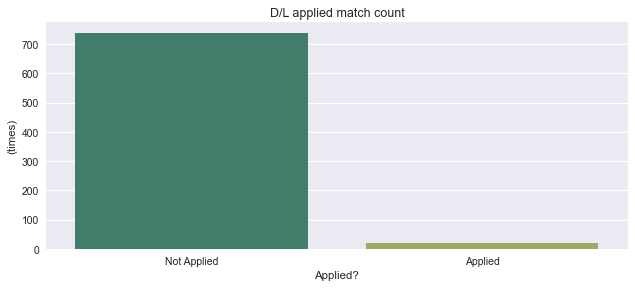

In [107]:
plt.figure(figsize=(10,4),dpi=75)
sns.countplot(df_matches['dl_applied'],palette='gist_earth')

plt.ylabel('(times)')
plt.xlabel('Applied?')
plt.title('D/L applied match count')
plt.show()

* Very few matches have got a result after appling D/L rule. In count it is 19.

# Result and Conclusion :

- The highest number of match played in IPL season was 2013,2014,2015.

- The highest number of match won by Mumbai Indians ie 4 match out of 12 matches.

- Teams which Bowl first has higher chances of winning then the team which bat first.

- After winning toss more teams decide to do fielding first.

- In finals teams which decide to do fielding first win the matches more then the team which bat first.

- In finals most teams after winning toss decide to do fielding first.